In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [42]:
dataset=pd.read_csv('covtype.csv')
dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [43]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [45]:
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [46]:
dataset['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [47]:
dataset['Wilderness_Area3'].value_counts()

Wilderness_Area3
0    327648
1    253364
Name: count, dtype: int64

In [48]:
dataset = dataset.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
        'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10','Soil_Type11', 
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14','Soil_Type15', 'Soil_Type16', 'Soil_Type17',
        'Soil_Type18','Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22','Soil_Type23', 
        'Soil_Type24', 'Soil_Type25', 'Soil_Type26','Soil_Type27', 'Soil_Type28', 'Soil_Type29',
        'Soil_Type30','Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34','Soil_Type35', 
        'Soil_Type36', 'Soil_Type37', 'Soil_Type38','Soil_Type39', 'Soil_Type40'],axis=0)
dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,3


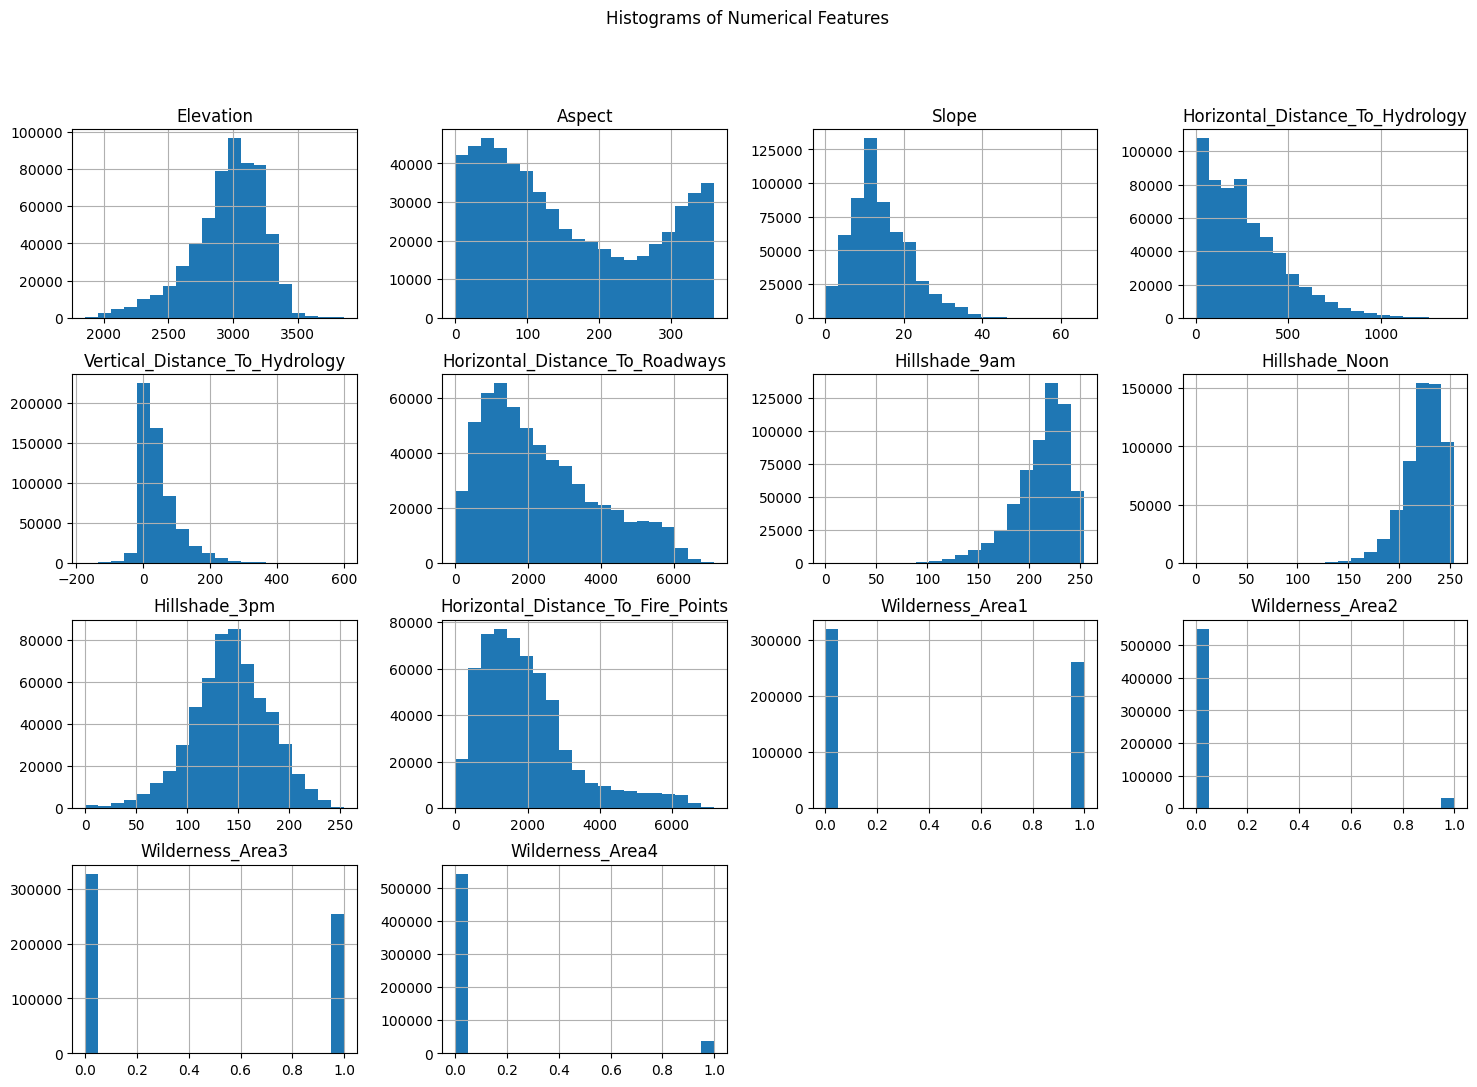

In [49]:
dataset[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']].hist(bins=20,figsize=(18,12))
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [79]:
dataset[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']].max()

Elevation                             3858
Aspect                                 360
Slope                                   66
Horizontal_Distance_To_Hydrology      1397
Vertical_Distance_To_Hydrology         601
Horizontal_Distance_To_Roadways       7117
Hillshade_9am                          254
Hillshade_Noon                         254
Hillshade_3pm                          254
Horizontal_Distance_To_Fire_Points    7173
Wilderness_Area1                         1
Wilderness_Area2                         1
Wilderness_Area3                         1
Wilderness_Area4                         1
dtype: int64

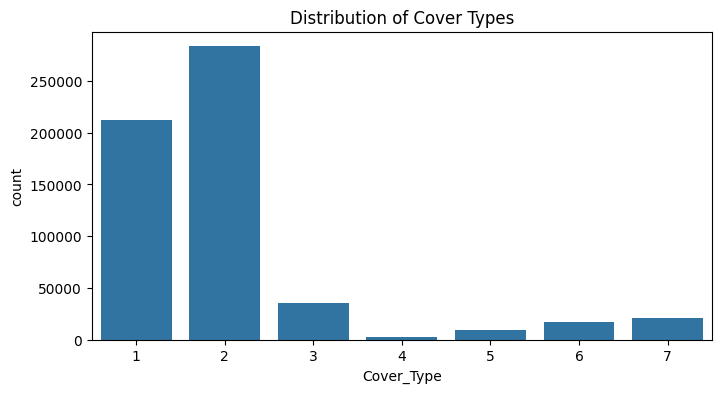

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x='Cover_Type', data=dataset)
plt.title('Distribution of Cover Types')
plt.show()

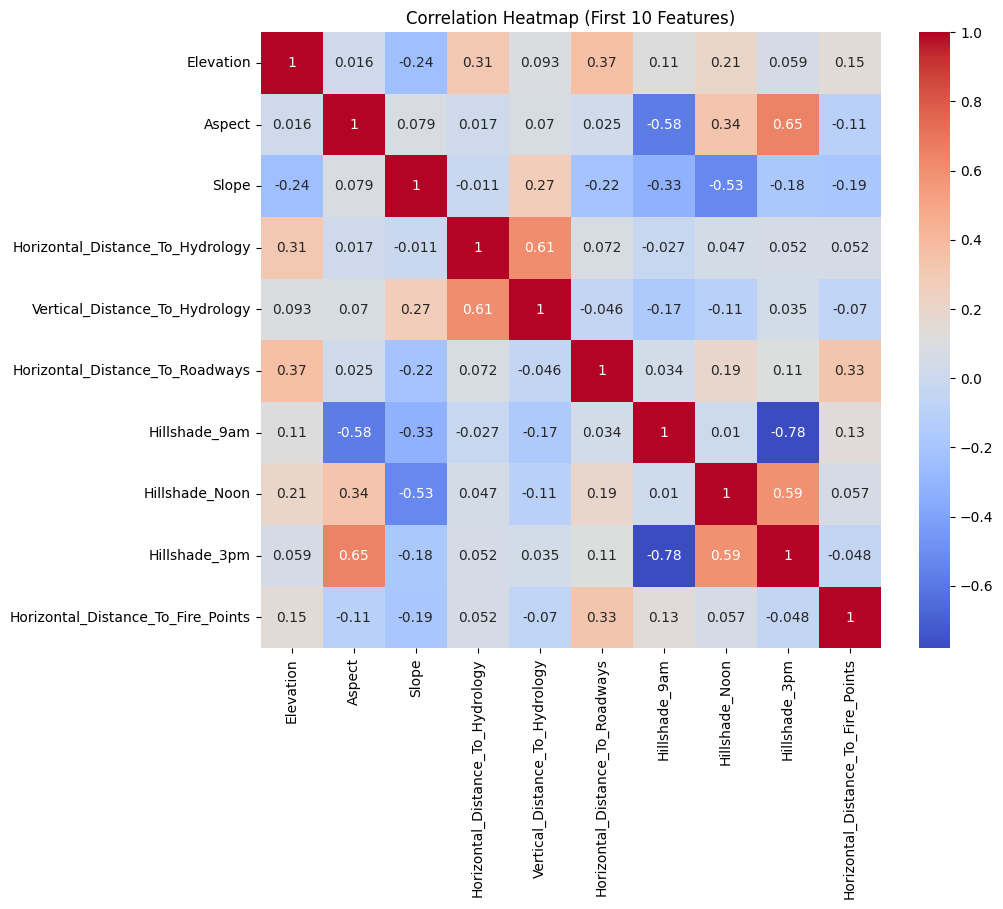

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.iloc[:, :10].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (First 10 Features)')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [53]:
x=dataset.drop('Cover_Type',axis=1)
y=dataset['Cover_Type']

In [54]:
x

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0


In [55]:
pd.DataFrame(y)

,Cover_Type
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


In [56]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
logistic_regression_model=LogisticRegression()
logistic_regression_model.fit(X_train,y_train)

c:\Users\kamr0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
logistic_regression_y_pred=logistic_regression_model.predict(X_test)

In [59]:
logistic_regression_accuarcy=accuracy_score(y_test,logistic_regression_y_pred)
logistic_regression_accuarcy

0.6200872610862026

In [60]:
random_forest_model=RandomForestClassifier()

In [61]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
random_forest_y_pred = random_forest_model.predict(X_test)

In [63]:
logistic_regression_accuarcy=accuracy_score(y_test,logistic_regression_y_pred)
logistic_regression_accuarcy

0.6200872610862026

In [64]:
knn_model = KNeighborsClassifier()

In [65]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
knn_y_pred = knn_model.predict(X_test)

In [67]:
knn_accuarcy= accuracy_score(y_test, knn_y_pred)
knn_accuarcy

0.9686582962574116

In [68]:
knn_f1_score=f1_score(y_test, knn_y_pred, average='weighted')
knn_f1_score

0.9686006472161525

In [69]:
knn_f1_score=precision_score(y_test, knn_y_pred, average='weighted')
knn_f1_score

0.9686055288029473

In [70]:
knn_recall_score=recall_score(y_test, knn_y_pred, average='weighted')
knn_recall_score

0.9686582962574116

In [71]:
knn_confusion_matrix=confusion_matrix(y_test, knn_y_pred)
knn_confusion_matrix

array([[41199,  1255,     1,     0,    28,     3,    71],
       [ 1138, 55110,    71,     0,   119,    47,    15],
       [    3,    85,  6910,    18,     7,    98,     0],
       [    0,     1,    74,   416,     0,    35,     0],
       [   25,   154,    17,     0,  1789,    10,     0],
       [    4,    83,   124,    16,     8,  3254,     0],
       [  108,    24,     0,     0,     0,     0,  3883]])

In [72]:
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97     42557
           2       0.97      0.98      0.97     56500
           3       0.96      0.97      0.97      7121
           4       0.92      0.79      0.85       526
           5       0.92      0.90      0.91      1995
           6       0.94      0.93      0.94      3489
           7       0.98      0.97      0.97      4015

    accuracy                           0.97    116203
   macro avg       0.95      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



In [74]:
import joblib
logistic_regression_model.fit(x, y)
random_forest_model.fit(x, y)
knn_model.fit(x, y)
joblib.dump(logistic_regression_model, 'logistic_regression_model.joblib')
joblib.dump(random_forest_model, 'random_forest_model.joblib')
joblib.dump(knn_model, 'knn_model.joblib')

c:\Users\kamr0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['knn_model.joblib']